<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<font size=7 color='#13DAE2'>
Sebastian Carillo Mejía - 1001414595
</font>

------------------------




<font size=6 color='#13DAE2'>
Laboratorio 1.0
</font>

------------------------


12. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.tail(10)

,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
4990,2023-05-12 14:00:00,1.09051,1.09057,1.08891,1.08919,2245,8,0,1.089850,-0.00134,-0.00057,-0.000955
4991,2023-05-12 15:00:00,1.08917,1.08950,1.08812,1.08866,3440,8,0,1.088915,-0.00053,-0.00134,-0.000935
4992,2023-05-12 16:00:00,1.08866,1.08942,1.08792,1.08811,3902,8,0,1.088385,-0.00055,-0.00051,-0.000530
4993,2023-05-12 17:00:00,1.08811,1.08972,1.08615,1.08622,6036,8,0,1.087165,-0.00189,-0.00055,-0.001220
4994,2023-05-12 18:00:00,1.08623,1.08649,1.08542,1.08552,2978,8,0,1.085875,-0.00070,-0.00188,-0.001290
4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140
4999,2023-05-12 23:00:00,1.08521,1.08522,1.08478,1.08494,706,8,0,1.085075,-0.00024,-0.00010,-0.000170


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                5000 non-null   object 
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 468.9+ KB


In [4]:
# check if there are null values
df.isna().sum()

time                  0
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

In [5]:
# Set timestamp index

df.index = pd.to_datetime(df['time'])
df.drop(columns=['time'], inplace=True)
df.head(10)


,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
2022-07-25 18:00:00,1.02181,1.02229,1.02057,1.02099,4755,8,0,1.021400,-0.00082,-0.00304,-0.001930
2022-07-25 19:00:00,1.02099,1.02248,1.02062,1.02211,2438,8,0,1.021550,0.00112,-0.00082,0.000150
2022-07-25 20:00:00,1.02211,1.02289,1.02136,1.02201,2114,8,0,1.022060,-0.00010,0.00112,0.000510
2022-07-25 21:00:00,1.02201,1.02273,1.02185,1.02211,1589,8,0,1.022060,0.00010,-0.00010,0.000000


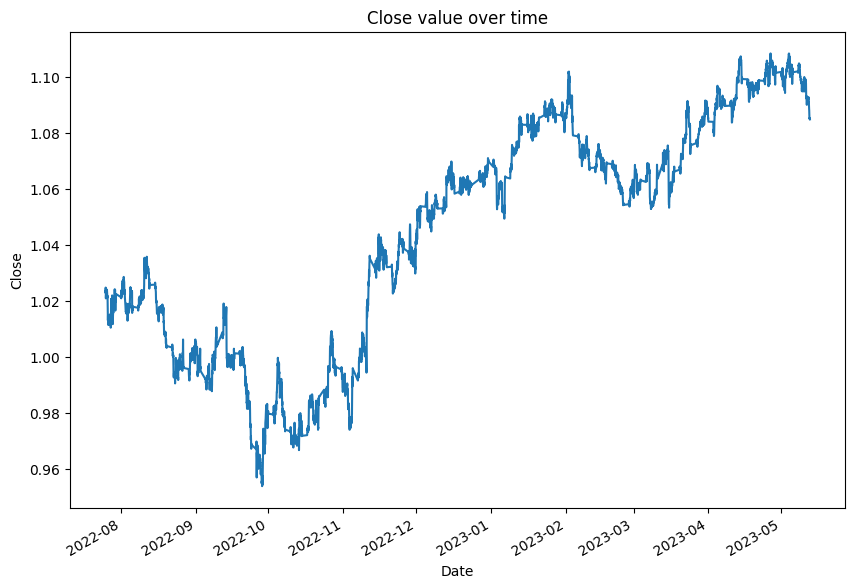

In [6]:
fig = plt.figure(figsize=(10,7))
df['close'].plot()

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close value over time')
plt.show()

In [7]:
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


### Extraemos las columnas de interés y procedemos a generar una nueva con la diferencia de 'close' entre cada hora

In [8]:
DfDist = df.drop(columns=['open','high','low','tick_volume','spread', 'real_volume','MeanCloseOpen','Diff_Close','Diff_Open','Diff_MeanCloseOpen'])
DfDist['DiffPrice'] = DfDist['close'].diff(1)
DfDist.sample(10)

,close,DiffPrice
time,,
2023-03-20 04:00:00,1.06797,0.00047
2022-10-18 02:00:00,0.98435,0.00012
2022-12-06 20:00:00,1.04637,-0.00183
2022-08-04 04:00:00,1.01690,0.00039
2023-03-20 17:00:00,1.07209,-0.00057
2022-10-04 20:00:00,0.99743,0.00042
2023-02-16 23:00:00,1.06715,-0.00020
2023-01-03 19:00:00,1.05460,-0.00118
2022-10-31 09:00:00,0.99292,-0.00230


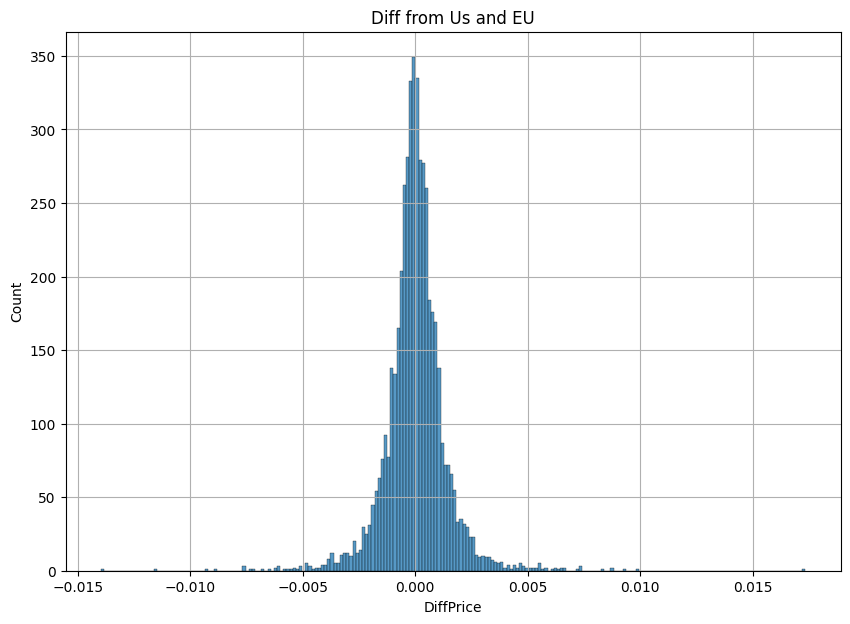

In [9]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data=DfDist,x='DiffPrice')

plt.title('Diff from Us and EU')
plt.grid()
plt.show()

### Usamos fitter para encontar la distribución que siguen los datos

In [26]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(DfDist['DiffPrice'].dropna(),
           distributions=get_distributions())
f.fit()
#f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')


2024-09-24 15:22:49.450 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
/home/sebastian/Desktop/For_studyng/U/8th/Statistics_learning/venv/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/sebastian/Desktop/For_studyng/U/8th/Statistics_learning/venv/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval an

{'johnsonsu': {'a': -0.020654532350683215,
  'b': 1.049797421216857,
  'loc': -1.5194909287993722e-05,
  'scale': 0.0008808828671326262}}

### Select only 2023 registers

In [10]:
Data2023 = df[ (df.index >= '2023-01-01') & (df.index <= '2024-01-01')]
Data2023

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2023-01-02 00:00:00,1.06998,1.07061,1.06795,1.06796,98,57,0,1.068970,-0.00200,-0.00063,-0.001315
2023-01-02 01:00:00,1.06847,1.06965,1.06847,1.06965,91,183,0,1.069060,0.00169,-0.00151,0.000090
2023-01-02 02:00:00,1.06965,1.07060,1.06904,1.07058,325,11,0,1.070115,0.00093,0.00118,0.001055
2023-01-02 03:00:00,1.07058,1.07075,1.06837,1.06896,271,26,0,1.069770,-0.00162,0.00093,-0.000345
2023-01-02 04:00:00,1.06895,1.06896,1.06799,1.06880,137,78,0,1.068875,-0.00016,-0.00163,-0.000895
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


## 8

In [11]:
# Mean every 15 days
Data202315DMean = Data2023.groupby(pd.Grouper(freq='15D')).mean()
Data202315DMean.head()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2023-01-02,1.069313,1.070248,1.068430,1.069361,3503.856061,10.181818,0.0,1.069337,0.000047,0.000043,0.000045
2023-01-17,1.085552,1.086401,1.084746,1.085565,3191.670455,8.973485,0.0,1.085558,0.000015,0.000020,0.000017
2023-02-01,1.077734,1.078544,1.076861,1.077679,3179.253788,8.863636,0.0,1.077707,-0.000066,-0.000069,-0.000068
2023-02-16,1.063187,1.063884,1.062480,1.063150,2926.143939,8.833333,0.0,1.063169,-0.000034,-0.000034,-0.000034
2023-03-03,1.063175,1.064041,1.062303,1.063186,3618.418251,8.904943,0.0,1.063181,0.000026,0.000023,0.000024


In [13]:
# Mean every week
Data20231WMean = Data2023.groupby(pd.Grouper(freq='1W')).mean()
Data20231WMean.head()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2023-01-08,1.060026,1.060999,1.059065,1.059972,3606.366667,11.341667,0.0,1.059999,-0.000047,-0.000050,-0.000049
2023-01-15,1.075837,1.076790,1.074993,1.076002,3643.375000,9.141667,0.0,1.075920,0.000156,0.000156,0.000156
2023-01-22,1.082021,1.082941,1.081192,1.082041,3450.716667,9.091667,0.0,1.082031,0.000020,0.000020,0.000020
2023-01-29,1.088411,1.089192,1.087631,1.088414,2863.625000,8.941667,0.0,1.088412,0.000010,0.000007,0.000009
2023-02-05,1.089315,1.090211,1.088410,1.089281,3306.150000,8.900000,0.0,1.089298,-0.000062,-0.000060,-0.000061


In [14]:
# Mean every week
Data2023MMean = Data2023.groupby(pd.Grouper(freq='1M')).mean()
Data2023MMean.head()

/tmp/ipykernel_29382/1329865050.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Data2023MMean = Data2023.groupby(pd.Grouper(freq='1M')).mean()


,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2023-01-31,1.077433,1.078325,1.076588,1.077463,3347.763258,9.577652,0.0,1.077448,0.000031,0.000031,0.000031
2023-02-28,1.071221,1.071972,1.070433,1.071167,3029.912500,8.825000,0.0,1.071194,-0.000060,-0.000062,-0.000061
2023-03-31,1.070837,1.071657,1.070032,1.070874,3282.461818,8.901818,0.0,1.070855,0.000049,0.000049,0.000049
2023-04-30,1.096012,1.096711,1.095365,1.096051,2208.629167,8.854167,0.0,1.096032,0.000036,0.000036,0.000036
2023-05-31,1.099051,1.099718,1.098358,1.098980,2240.137500,8.704167,0.0,1.099015,-0.000069,-0.000070,-0.000069


## 9

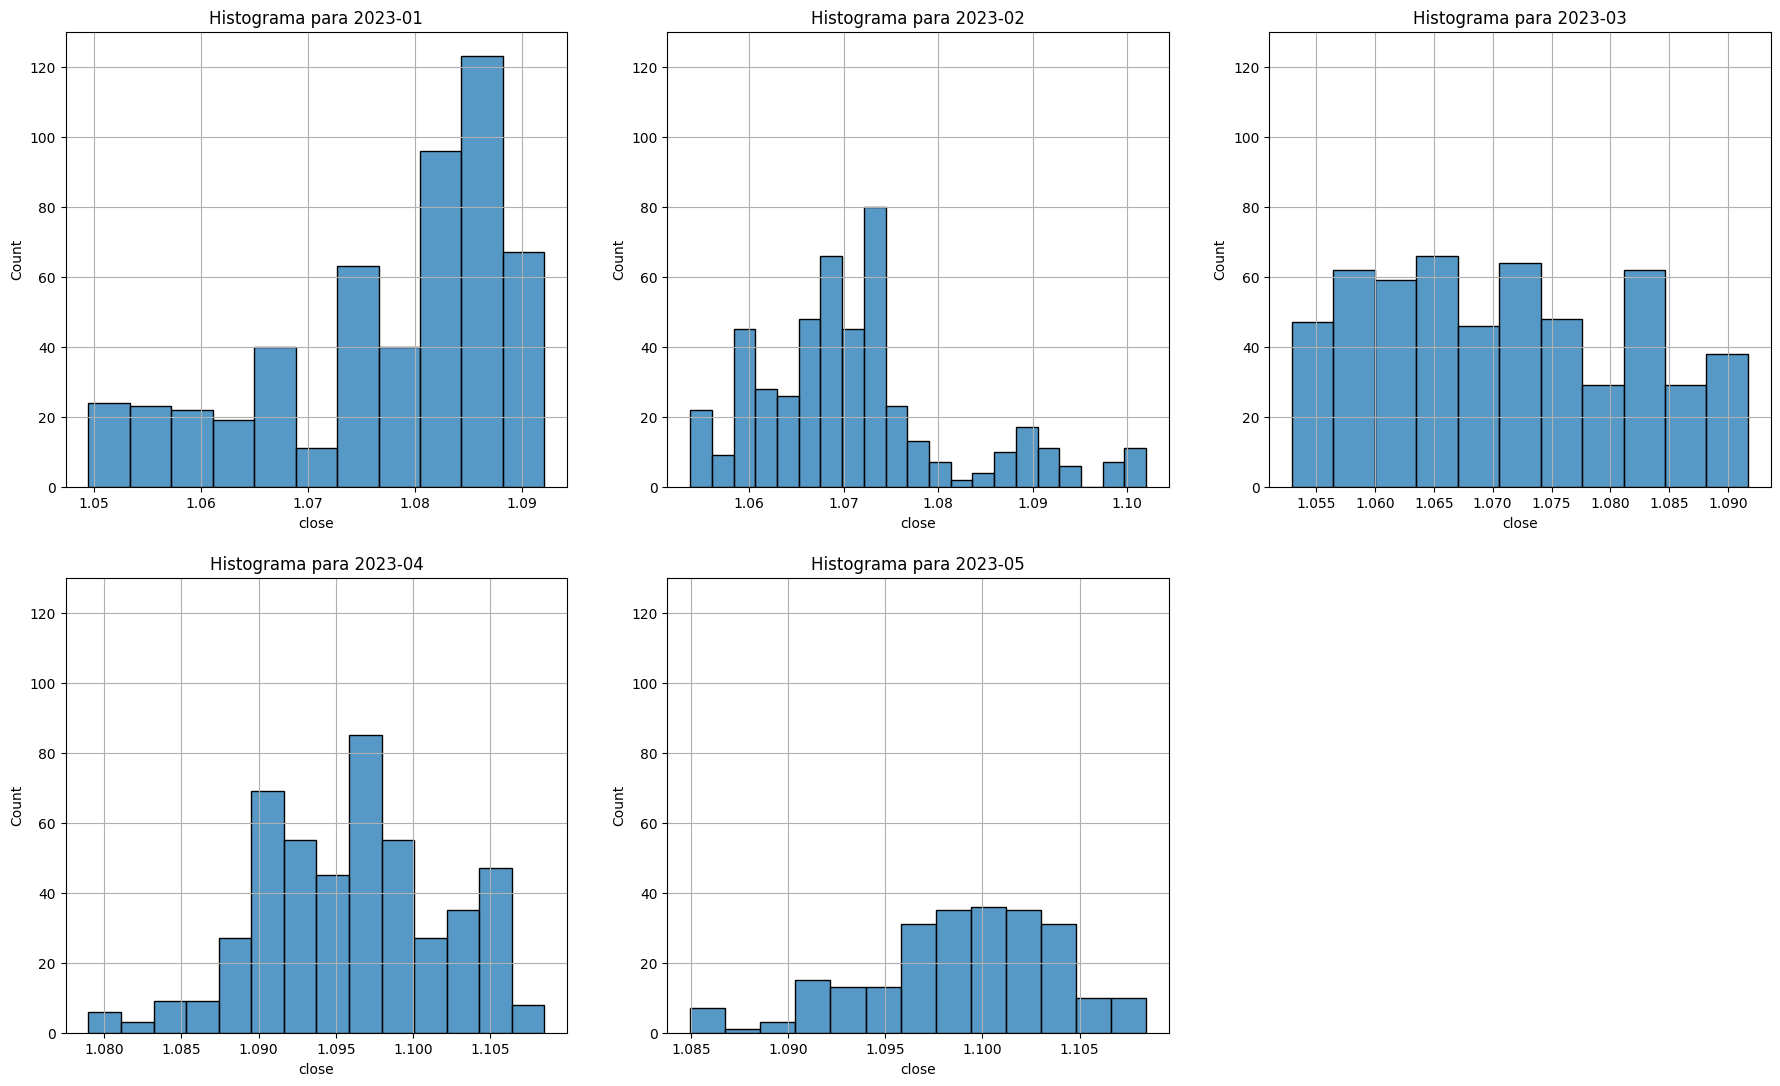

In [15]:
# Group the data
q=Data2023[['close']].groupby(pd.Grouper(freq='ME'))

# Crear la figura y los subplots
#fig, ax = plt.subplots(1, 2, figsize=(17, 10))
#plt.subplots_adjust(hspace=0.35,wspace=0.15)
fig = plt.figure(figsize=(22,13))

counter = 1
for key, group in q:
    plt.subplot(2,3,counter)
    sns.histplot(data=group,x='close')
    plt.title(f'Histograma para {key.strftime("%Y-%m")}')
    plt.ylim(0,130)
    plt.grid(True)
    counter += 1
    

<font size=7 color='#13DAE2'>
Breast Cancer
</font>

------------------------



<font size=6 color='#13DAE2'>
1. Load the data
</font>

In [79]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
#print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
#print(breast_cancer_wisconsin_diagnostic.variables) 


In [80]:
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# Add all in a single DataFrame

X['Target'] = y['Diagnosis']
X.head()

/tmp/ipykernel_31589/3668337452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Target'] = y['Diagnosis']


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [81]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [82]:
X.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Target'],
      dtype='object')


<font size=6 color='#13DAE2'>
2. Move To Pascal Notation
</font>

In [83]:
initialNames = X.columns

def PascalCase(element:str):
    splitted = element.split('_')
    
    modificadas = list(map(lambda x:x.capitalize(), splitted))
    result = ''.join(modificadas)
    return result

transformedNames = [PascalCase(x) for x in X.columns]
X.columns = transformedNames
X.head()
#transformedNames

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


<font size=6 color='#13DAE2'>
3. Exploring
</font>

In [84]:
X.head(5)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [85]:
X.sample(5)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Target
57,14.71,21.59,95.55,656.9,0.11370,0.13650,0.129300,0.08123,0.2027,0.06758,...,30.70,115.7,985.5,0.1368,0.42900,0.35870,0.18340,0.3698,0.10940,M
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.046860,0.02739,0.1852,0.05294,...,36.91,110.1,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165,M
423,13.66,19.13,89.46,575.3,0.09057,0.11470,0.096570,0.04812,0.1848,0.06181,...,25.50,101.4,708.8,0.1147,0.31670,0.36600,0.14070,0.2744,0.08839,B
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.273300,0.09711,0.2041,0.06898,...,27.57,125.4,832.7,0.1419,0.70900,0.90190,0.24750,0.2866,0.11550,M
179,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,0.06133,...,16.15,86.7,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319,B


In [86]:
X.tail(5)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [87]:
# Verify data integrity
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

In [88]:
X.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<font size=6 color='#13DAE2'>
4. Null Values
</font>

In [89]:
X.isna().sum()

Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
Target               0
dtype: int64

<font size=6 color='#13DAE2'>
5. Unique Values
</font>

In [90]:
y['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

<font size=6 color='#13DAE2'>
6. Count Plot
</font>

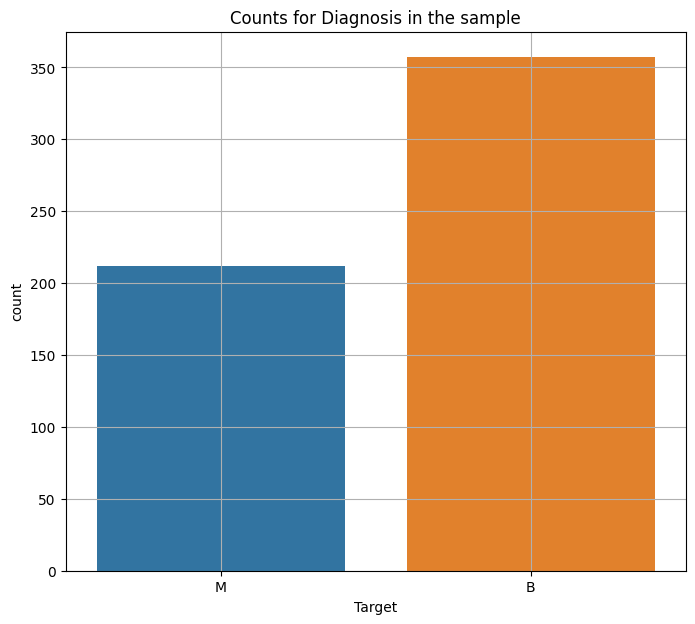

In [91]:
fig = plt.figure(figsize=(8,7))

sns.countplot(data=X,x='Target', hue='Target')
plt.title('Counts for Diagnosis in the sample')
plt.grid()
plt.show()

<font size=6 color='#13DAE2'>
7. DiagnosisNumeric Column
</font>

In [92]:
X['DiagnosisNumeric'] = X['Target'].map({'M': 1, 'B': 0})
X.head(10)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Target,DiagnosisNumeric
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,M,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,M,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,M,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,M,1


<font size=6 color='#13DAE2'>
8. Normalizing
</font>

In [93]:
# To exclude Numerical Target just exclude here the int64
numeric = X.select_dtypes(include=['float64'])#, 'int64'])

XNormalized = numeric.apply(lambda x: (x - x.mean())/x.std(), axis=0 )
XNormalized['DiagnosisNumeric'] = X['DiagnosisNumeric']
XNormalized.head(10)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,DiagnosisNumeric
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,1
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,1
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1
5,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,1.888343,...,-0.313560,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831,1
6,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662,...,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718,1
7,-0.118413,0.358135,-0.072803,-0.218772,1.602639,1.139100,0.060972,0.281702,1.402121,1.658894,...,0.400695,0.099361,0.028834,1.446688,0.724148,-0.021035,0.623647,0.477221,1.724917,1
8,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,1.571079,...,0.822090,-0.031581,-0.248145,1.661295,1.816711,1.278909,1.390393,2.387756,1.287517,1
9,-0.473118,1.104467,-0.329192,-0.508616,1.581308,2.561105,1.737343,0.940932,0.796597,2.780649,...,2.440961,-0.286026,-0.297148,2.318256,5.108382,3.991920,1.618591,2.368360,6.840837,1


<font size=6 color='#13DAE2'>
9. Reducing dimensions
</font>

In [94]:
# Check the possible patterns
XNormalized.columns

Index(['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'DiagnosisNumeric'],
      dtype='object')

In [95]:
# Define important strings
patterns = ['Radius','Texture','Perimeter','Area','Smoothness','Compactness','Concavity','ConcavePoints','Symmetry','FractalDimension']
names = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean',"SymetryMean","FractalDimensionMean"]


for name,pattern in zip(names,patterns):
    matches = [x for x in XNormalized.columns if x.startswith(pattern)]
    #print(matches)
    XNormalized[name]  = XNormalized[matches].mean(axis=1)
    
    
XNormalized['Diagnosis'] = y['Diagnosis']
XNormalized.sample(10)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymetryMean,FractalDimensionMean,Diagnosis
152,-1.247512,-0.918302,-1.160091,-1.007885,0.770735,1.052000,4.039155,0.764141,2.686123,4.272074,...,0.232782,-0.547025,-0.559033,0.646845,1.709307,6.244907,2.684788,1.608576,5.479296,B
45,1.283384,-0.392847,1.305856,1.196630,0.962713,1.216733,1.362280,1.339615,0.347926,-0.326840,...,-0.701741,1.100454,1.029528,0.756703,1.214445,1.453877,1.349686,0.750656,0.004190,M
282,1.496207,-0.257996,1.449895,1.392700,0.521875,0.754723,0.925751,1.178286,0.296858,-0.549208,...,-0.058769,0.937160,0.995772,0.303660,0.442225,0.548890,1.126131,0.296419,-0.525721,M
460,0.837874,1.827549,0.791431,0.784313,0.186270,0.126087,0.149281,0.396642,-0.067916,0.001755,...,1.047943,1.233692,1.259281,0.654106,-0.040075,-0.015203,0.489980,0.032499,0.201760,M
458,-0.319885,1.357894,-0.385162,-0.382733,-0.900893,-1.015114,-0.962613,-0.806620,-0.527530,-1.176655,...,0.798182,-0.488433,-0.415461,-0.564162,-0.952694,-0.973930,-0.844761,-0.834701,-1.067781,B
548,-1.261132,0.011707,-1.272442,-1.049089,-0.814148,-1.023256,-0.820741,-1.012919,-0.844883,-0.063398,...,0.087481,-0.936582,-0.813931,-0.409115,-0.942737,-0.653207,-0.841613,-0.409542,-0.063484,B
37,-0.311372,-0.202195,-0.385162,-0.372503,-0.464322,-1.262592,-0.792517,-0.507415,-1.257077,-0.590283,...,0.456971,-0.634194,-0.511921,-0.969503,-1.244741,-0.825734,-0.504537,-0.662638,-0.861709,B
457,-0.260295,1.385794,-0.323842,-0.332437,-0.600839,-0.990120,-0.766175,-0.727760,-0.702621,-0.985447,...,1.006233,-0.522260,-0.422571,-0.392242,-0.967322,-0.653643,-0.808002,-0.765484,-0.872765,B
466,-0.280158,0.337210,-0.246473,-0.335278,-0.683319,0.086324,0.247124,-0.356137,-0.910542,-0.367914,...,-0.158270,-0.236605,-0.318660,-0.159696,0.359466,0.524542,-0.060810,-0.684382,-0.234511,B
284,-0.351099,-0.834601,-0.324665,-0.392963,-1.292670,-0.161722,0.284756,-0.387063,-1.384748,-0.488305,...,-0.498889,-0.343996,-0.422744,-0.983408,0.161329,0.717477,0.126632,-1.018499,-0.409169,B


In [96]:
XNormalized.iloc[:,28:]

,Symmetry3,FractalDimension3,DiagnosisNumeric,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymetryMean,FractalDimensionMean,Diagnosis
0,2.748204,1.935312,1,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454,M
1,-0.243675,0.280943,1,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767,M
2,1.151242,0.201214,1,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286,M
3,6.040726,4.930672,1,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995,M
4,-0.867590,-0.396751,1,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.412639,-0.153272,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1.358963,-0.708467,1,2.262762,0.303132,2.062496,2.319074,0.834796,0.045809,1.091639,2.004001,-0.936231,-0.490281,M
565,-0.531387,-0.973122,1,1.512694,2.129283,1.397014,1.502133,-0.337297,-0.160662,0.393593,0.934487,-0.312618,-0.840309,M
566,-1.103578,-0.318129,1,0.482422,1.053425,0.509009,0.395171,-0.675876,0.324159,0.294468,0.377003,-0.934205,-0.392078,M
567,1.917396,2.217684,1,1.651053,1.751949,1.906541,1.464675,0.926916,3.062208,2.596660,1.909844,1.459686,1.387908,M


<font size=6 color='#13DAE2'>
10. Histograms
</font>

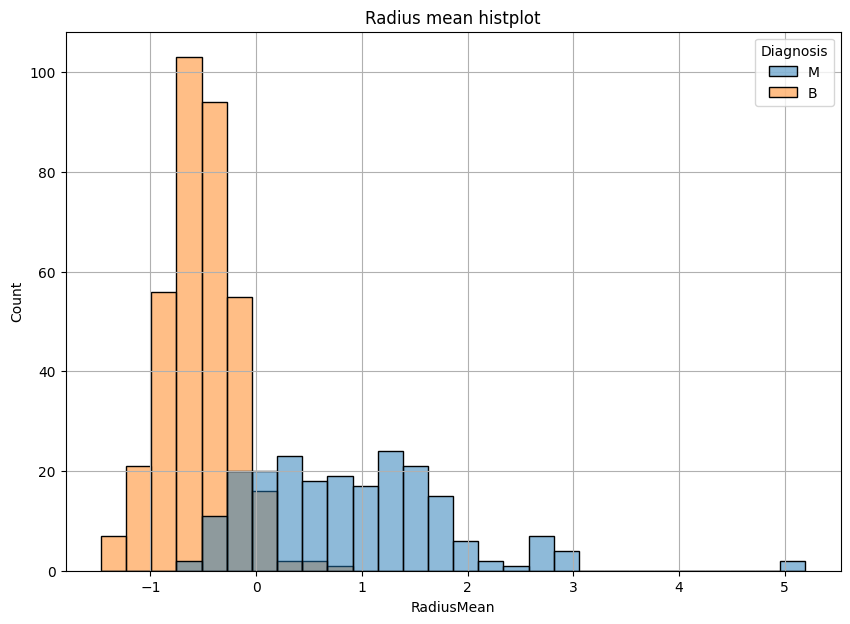

In [97]:

fig = plt.figure(figsize=(10,7))

sns.histplot(data=XNormalized, x='RadiusMean', hue='Diagnosis')
plt.title('Radius mean histplot')
plt.grid()
plt.show()

<font size=6 color='#13DAE2'>
10. Violins
</font>

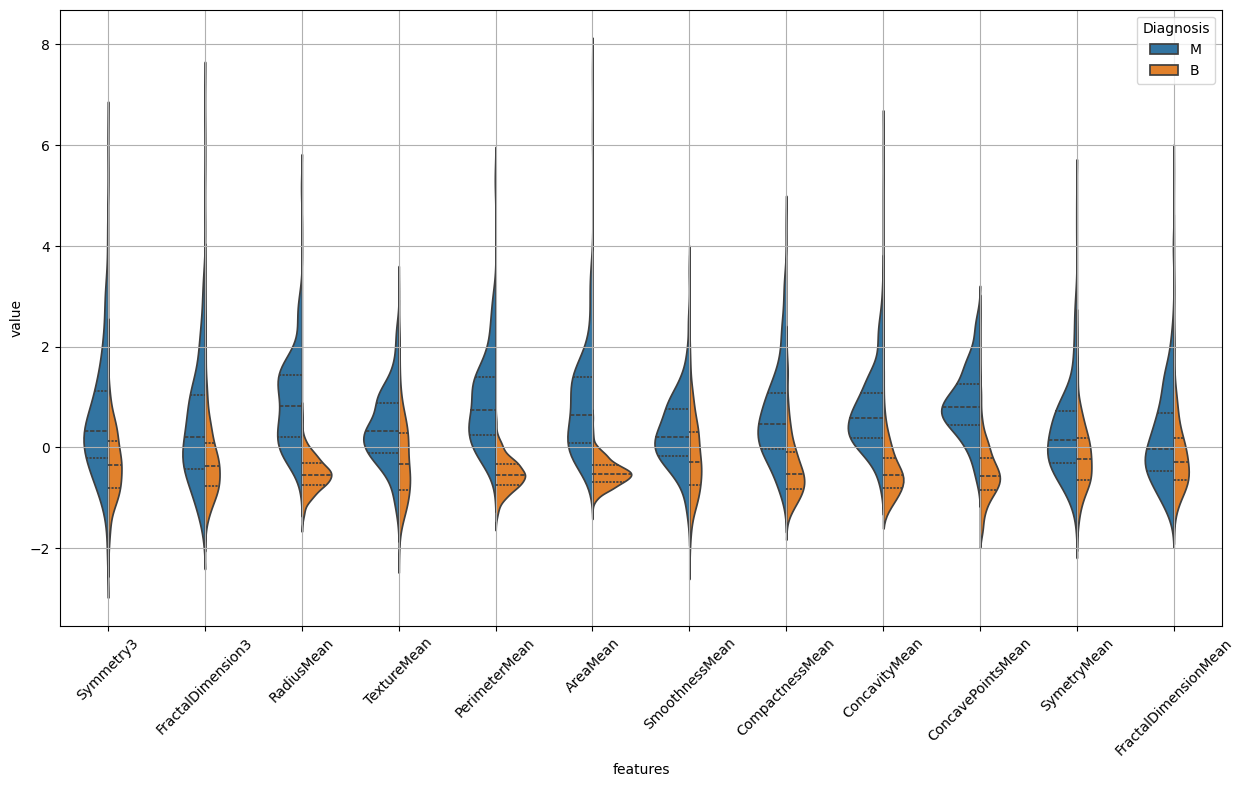

In [106]:
fig = plt.figure(figsize=(15,8))

toMelt = XNormalized.iloc[:, 28:].drop(columns=['DiagnosisNumeric'])
data = pd.melt(toMelt, id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(data=data,x="features",y="value",  hue="Diagnosis", split=True, inner="quart")
plt.xticks(rotation=45)
plt.grid()
plt.show()


<font size=6 color='#13DAE2'>
11. Outliers
</font>

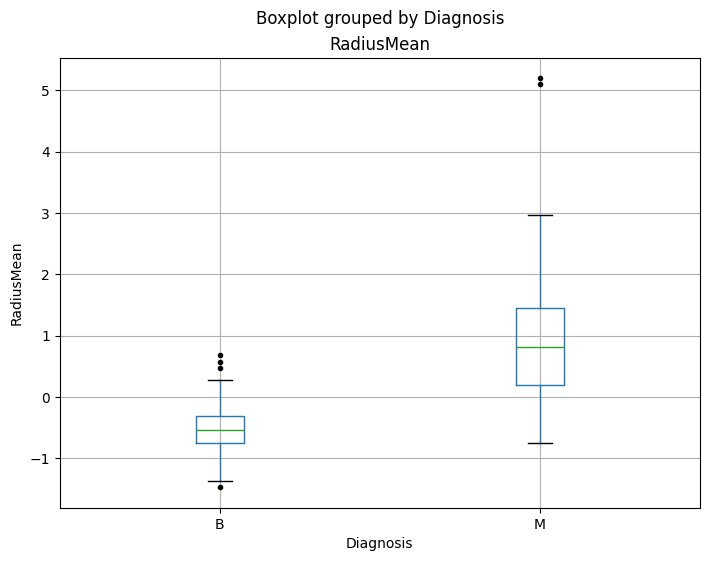

In [116]:

#sns.boxplot(data=XNormalized,x="RadiusMean", hue='Diagnosis')

XNormalized.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(8,6))
plt.ylabel('RadiusMean')
plt.show()

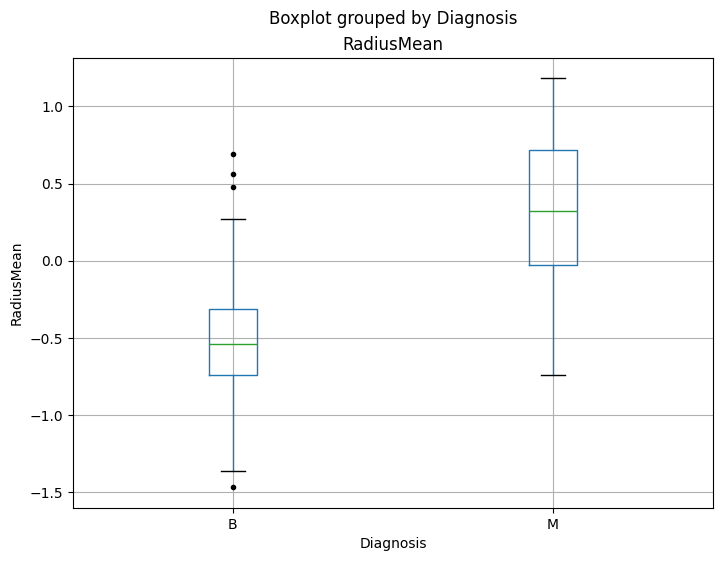

In [119]:
# Deleting outliers using IQR

Q1 = XNormalized['RadiusMean'].quantile(0.25)
Q3 = XNormalized['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1

XNormalized = XNormalized[~((XNormalized['RadiusMean'] < (Q1 - 1.5 * IQR)) | (XNormalized['RadiusMean'] > (Q3 + 1.5 * IQR)))]

# PLot again to check the results

XNormalized.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(8,6))
plt.ylabel('RadiusMean')
plt.show()

<font size=6 color='#13DAE2'>
12. Correlation Matrix
</font>

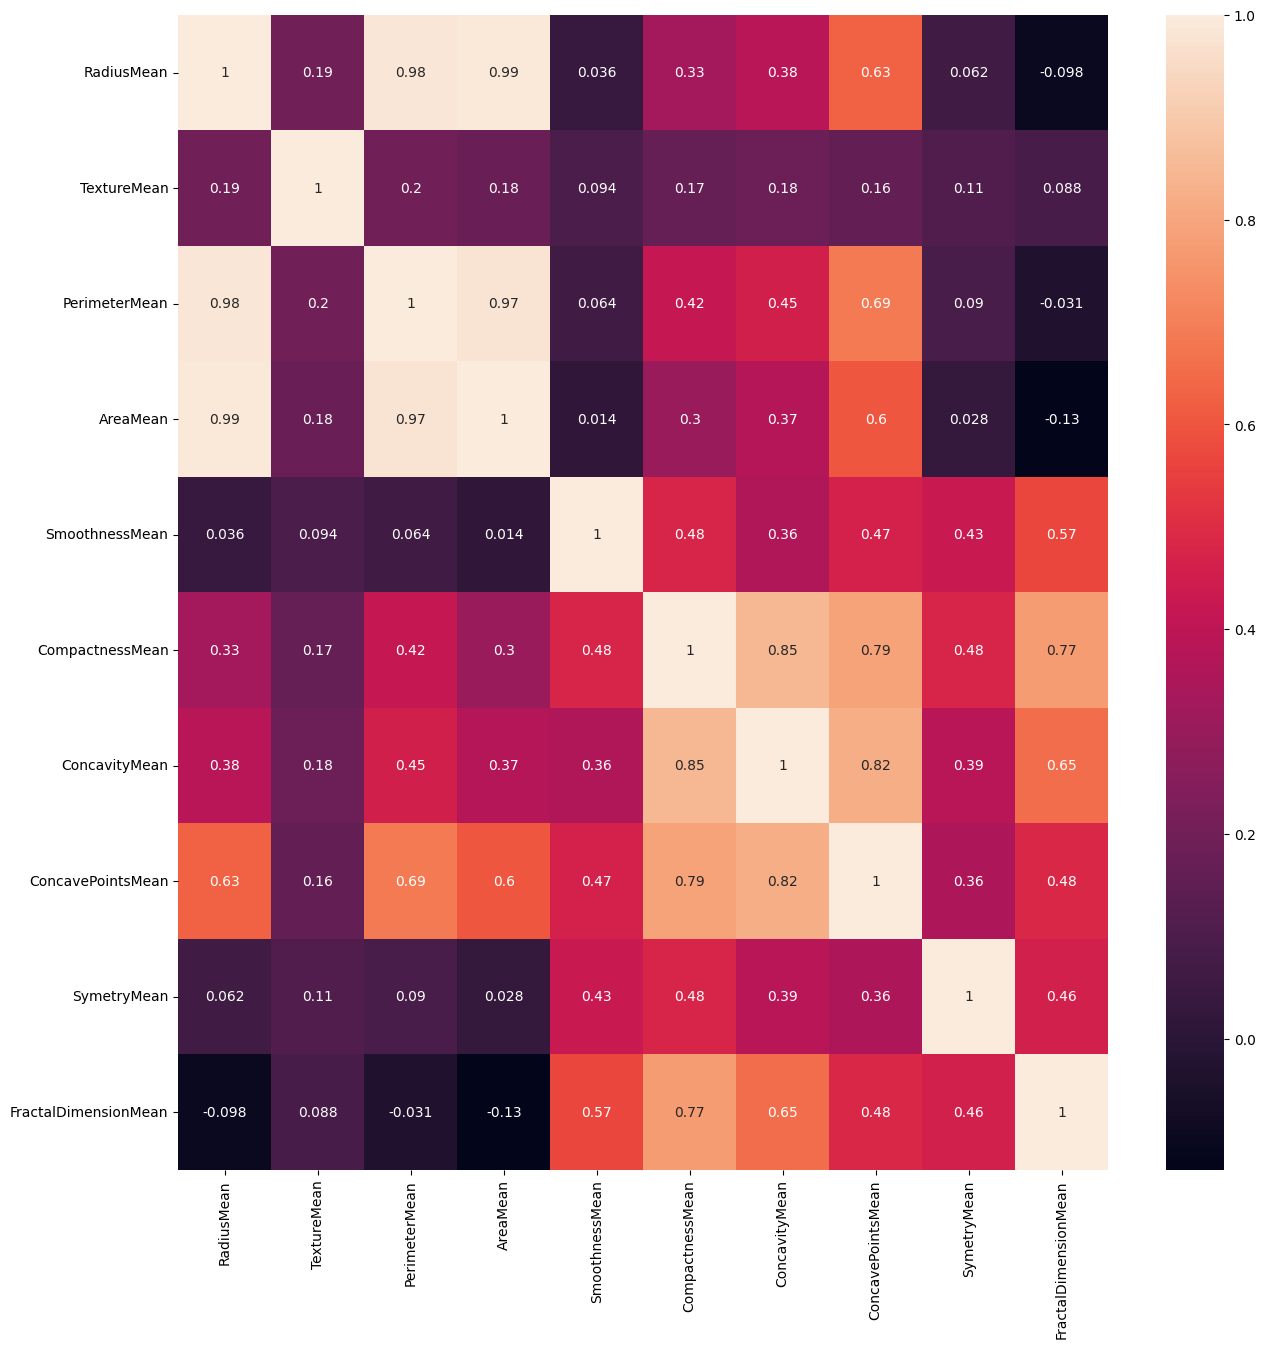

In [125]:
fig = plt.figure(figsize=(15,15))

sns.heatmap(XNormalized.select_dtypes(include=['float64']).iloc[:,30:].corr(), annot=True)
plt.show()

<font size=6 color='#13DAE2'>
13. Other possibilities
</font>

The joinplot to check the raltion or even use pairplots

<Figure size 1500x1500 with 0 Axes>

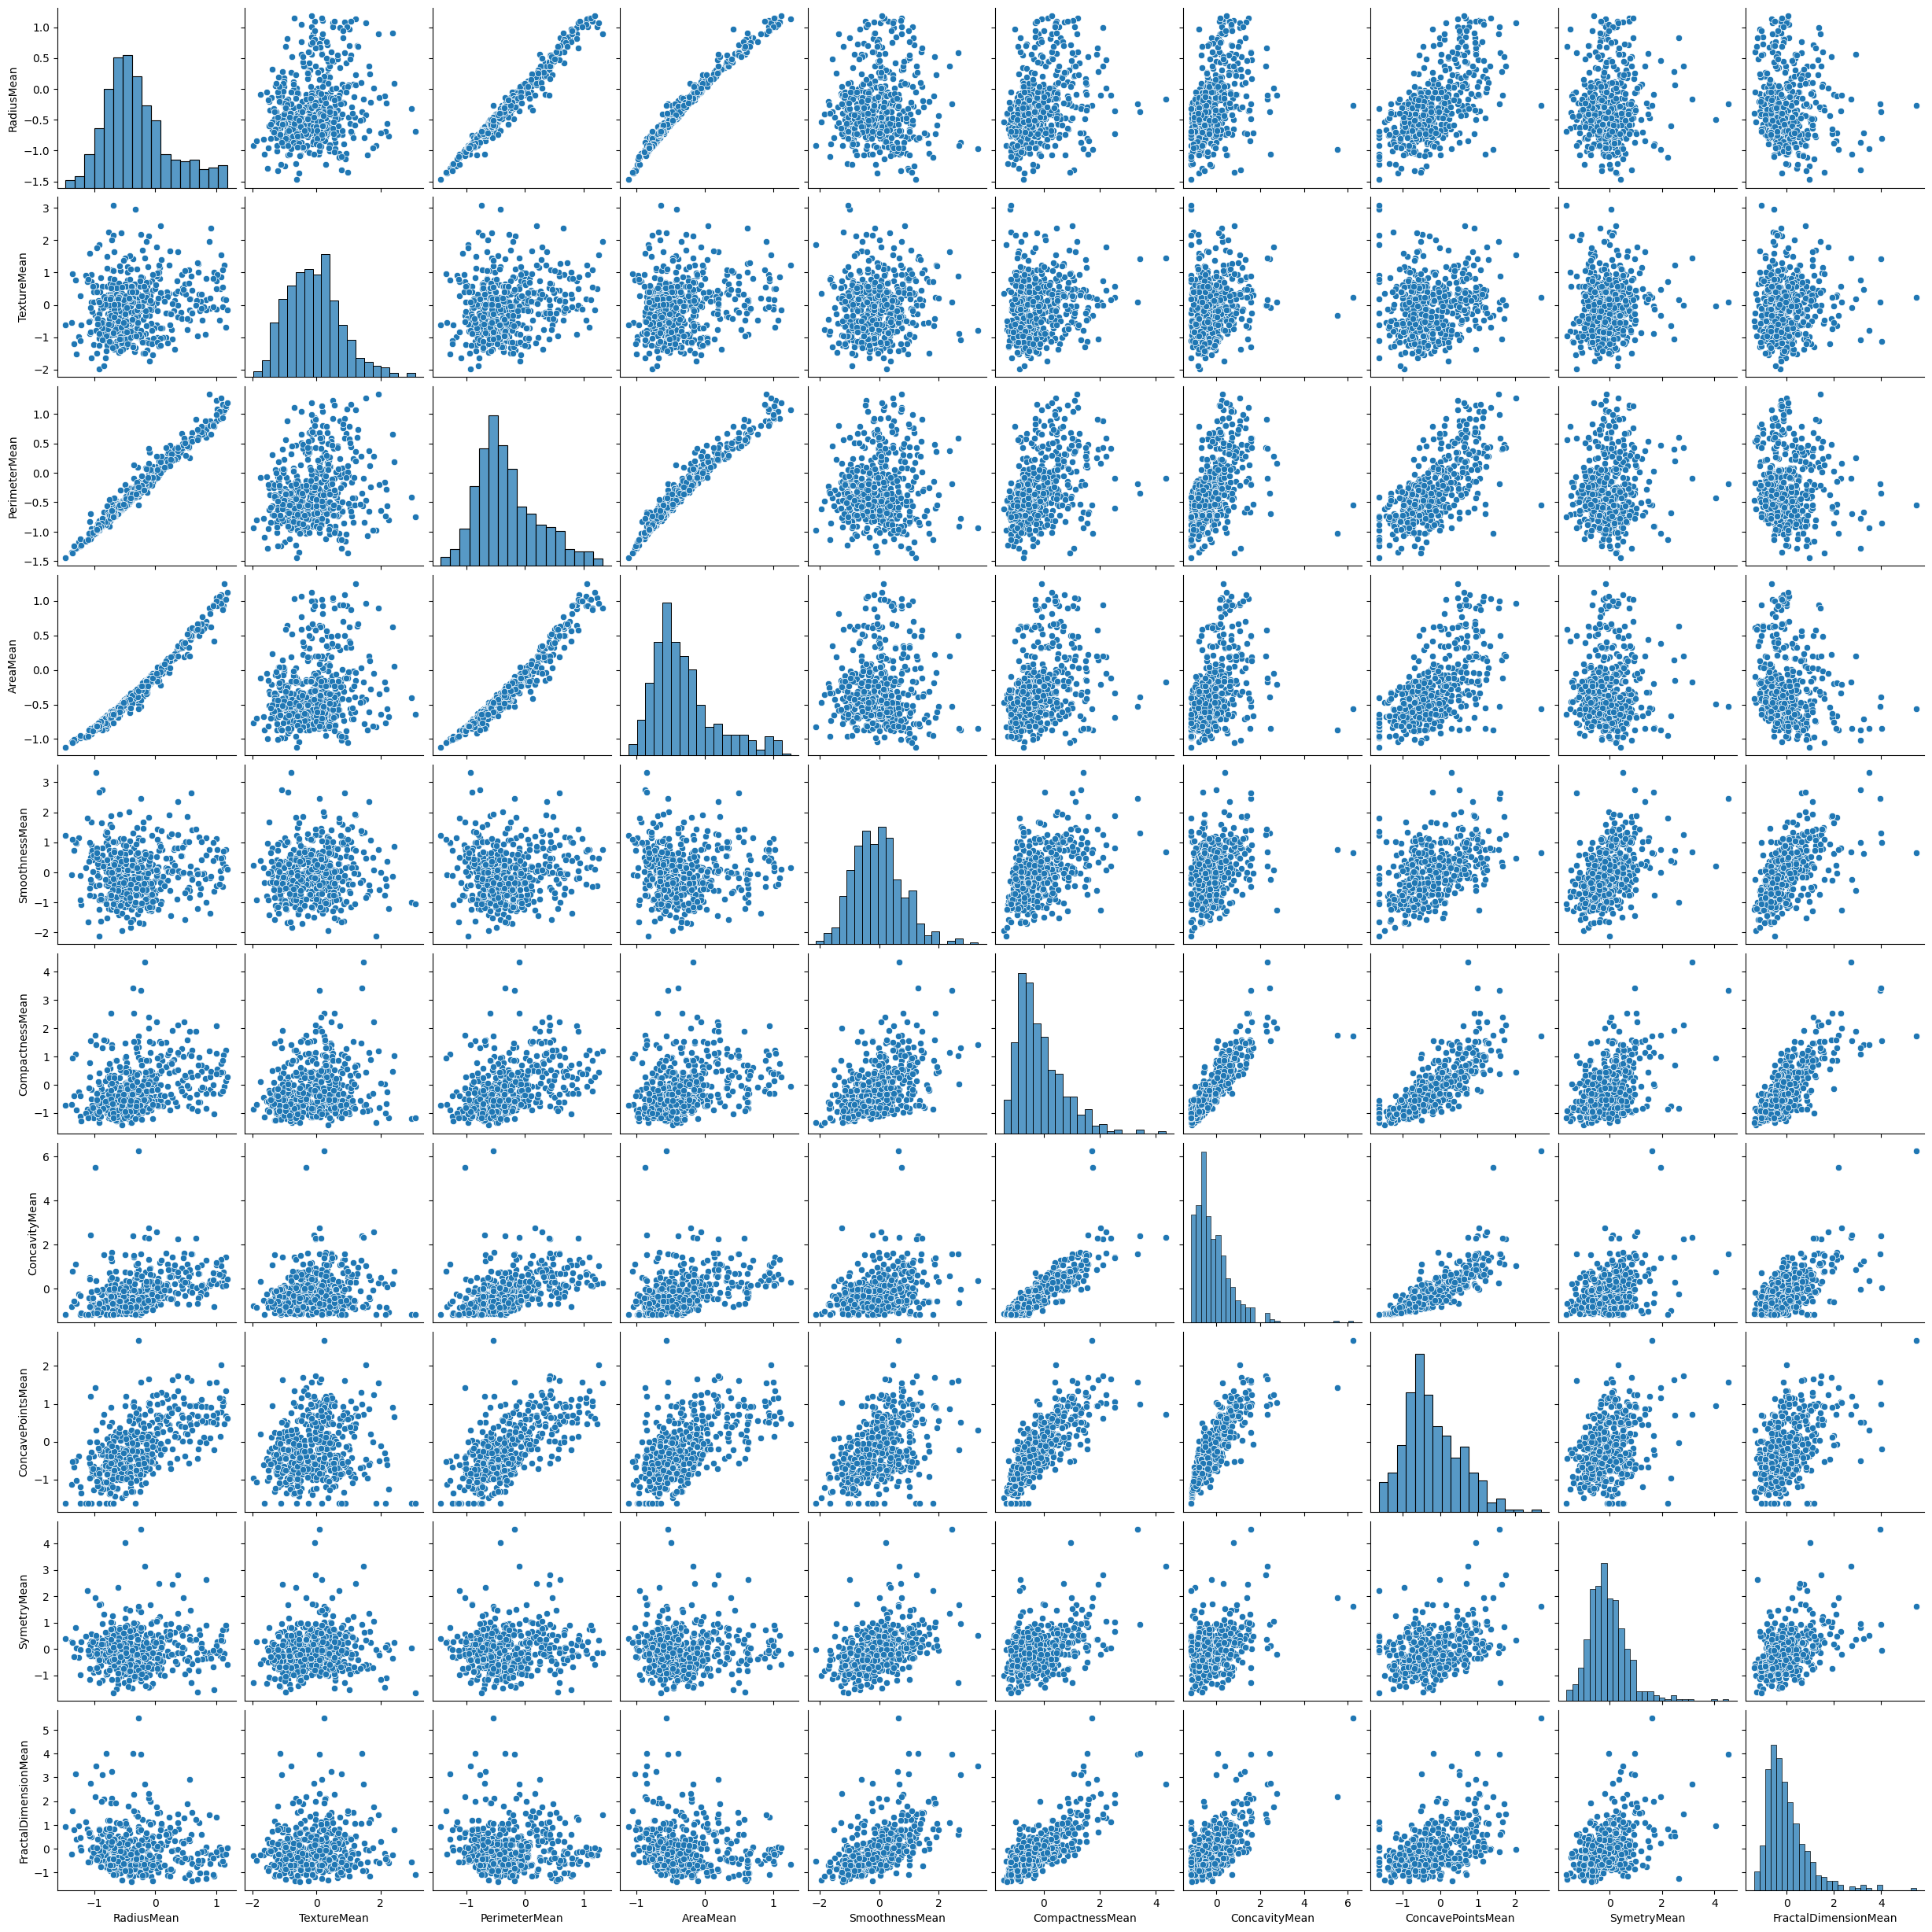

In [127]:
fig = plt.figure(figsize=(15,15))

sns.pairplot(XNormalized.select_dtypes(include=['float64']).iloc[:,30:])
plt.show()